In [1]:
import numpy as np
from trained_untrained_results_funcs import loop_through_datasets, load_perf, load_mean_sem_perf
import pandas as pd
from scipy.stats import pearsonr

In [2]:
def load_mean_sem_perf(model_name, dataset, feature_extraction, layer_num, 
                       resultsPath='/data/LLMs/brainscore/', seed_str='', noL2_str='', niter=1, perf='out_of_sample_r2', median=False, 
                       var_par_naming=False, return_perf=False, return_mean=False, print_res=True, clip_res=False):

   if dataset == 'pereira':
      subjects_perf_pd = {'perf': [], 'subjects': [], 'Exp': []}
   else:
      subjects_perf_pd = {'perf': [], 'subjects': []}

   for d, fe, exp, subjects, network in loop_through_datasets([dataset], [feature_extraction]):

      lang_indices = np.argwhere(network=='language')

      if var_par_naming:
         model_name_replaced= model_name.replace('EXP', exp)
         layer_perf = load_perf(f'{resultsPath}/results_{dataset}/{dataset}_{model_name_replaced}{feature_extraction}{seed_str}_{niter}{noL2_str}{exp}.npz', perf, clip_zero=clip_res)
      else:
         layer_perf = load_perf(f'{resultsPath}/results_{dataset}/{dataset}_{model_name}{feature_extraction}{seed_str}_layer_{layer_num}_{niter}{noL2_str}{exp}.npz', perf, clip_zero=clip_res)

      subjects_perf_pd['perf'].extend(layer_perf[lang_indices].squeeze())
      subjects_perf_pd['subjects'].extend(subjects[lang_indices].squeeze())

      if len(exp) > 0:
         subjects_perf_pd['Exp'].extend(np.repeat(exp, len(lang_indices)))

   subjects_perf_pd = pd.DataFrame(subjects_perf_pd)
      
   if median:
      if dataset == 'pereira':
            subject_avg_pd = subjects_perf_pd.groupby(['subjects', 'Exp']).median()
            subject_avg_pd = subject_avg_pd.groupby(['subjects']).mean() # mean across experiments 
      else:
            subject_avg_pd = subjects_perf_pd.groupby(['subjects']).median()
      
   else:
      if dataset == 'pereira':
            subject_avg_pd = subjects_perf_pd.groupby(['subjects', 'Exp']).mean()
            subject_avg_pd = subject_avg_pd.groupby(['subjects']).mean() # mean across experiments 
      else:
            subject_avg_pd = subjects_perf_pd.groupby(['subjects']).mean()
            
   
   if print_res:
      print(model_name, f"{float(subject_avg_pd.mean().iloc[0]):.2g}", f"{float(subject_avg_pd.std().iloc[0] / np.sqrt(len(subject_avg_pd))):.2g}")

   if return_perf:
      if dataset == 'pereira':
         subjects_perf_384 = subjects_perf_pd.loc[subjects_perf_pd['Exp']=='_384']['perf']
         subjects_perf_243 = subjects_perf_pd.loc[subjects_perf_pd['Exp']=='_243']['perf']
         return subjects_perf_384, subjects_perf_243
      else:
         return subjects_perf_pd['perf']
   
   if return_mean:
      return float(subject_avg_pd.mean().iloc[0])


SyntaxError: unmatched ')' (3362204804.py, line 16)

# Pereira

### Figure 2

In [20]:
for dataset in ['pereira', 'fedorenko', 'blank']:
    for fe in ['-sp', '-mp', '-lt']:
        # these performances are combined, such that voxels in both experiments have their results averaged
        gpt2xl_combined_perf = np.load(f'/home2/ebrahim/beyond-brainscore/analyze_results/figures_code/figures_data/figure2/gpt2xl_combined{fe}_{dataset}.npz')
        simple_combined_perf = np.load(f'/home2/ebrahim/beyond-brainscore/analyze_results/figures_code/figures_data/figure2/simple_combined{fe}_{dataset}.npz')
        
        if fe == '-lt':
            fe_str = ''
        else:
            fe_str = fe
            
        r, p = pearsonr(gpt2xl_combined_perf[fe_str][~np.isnan(gpt2xl_combined_perf[fe_str])], 
                        simple_combined_perf[''][~np.isnan(simple_combined_perf[''])])
        print(fe, round(r,2))
        
    print(gpt2xl_combined_perf[''].shape)

-sp 0.42
-mp 0.46
-lt 0.68
(13553,)
-sp 0.53
-mp 0.62
-lt 0.61
(97,)
-sp 0.53
-mp 0.57
-lt 0.27
(60,)


In [31]:
perf_pwr_glove_sp_384, perf_pwr_glove_sp_243 = load_mean_sem_perf('trained-var-parEXP-sp_pos+WN+glove', 'pereira', '', layer_num=None, 
                                                                  niter=1000, var_par_naming=True, return_perf=True)

load_mean_sem_perf('trained-var-parEXP-sp_pos+WN', 'pereira', '', layer_num=None, niter=1, var_par_naming=True)
load_mean_sem_perf('trained-var-parEXP-sp_glove', 'pereira', '', layer_num=None, niter=1, var_par_naming=True)
perf_gpt2xl_sp_384, perf_gpt2xl_sp_243 = load_mean_sem_perf('trained-var-parEXP-sp_gpt2xl', 'pereira', '', layer_num=None, niter=1, 
                                                            var_par_naming=True, return_perf=True)
_, _ = load_mean_sem_perf('trained-var-parEXP_gpt2xl', 'pereira', '', layer_num=None, niter=1, 
                                                            var_par_naming=True, return_perf=True)
_, _ = load_mean_sem_perf('trained-var-parEXP-mp_gpt2xl', 'pereira', '', layer_num=None, niter=1, 
                                                            var_par_naming=True, return_perf=True)
load_mean_sem_perf('trained-var-parEXP-sp_syntax', 'pereira', '', layer_num=None, niter=1, var_par_naming=True)
load_mean_sem_perf('trained-var-parEXP-sp_pos+WN+syntax', 'pereira', '', layer_num=None, niter=1000, var_par_naming=True)

trained-var-parEXP-sp_pos+WN+glove 0.02 0.0094
trained-var-parEXP-sp_pos+WN 0.015 0.0062
trained-var-parEXP-sp_glove 0.011 0.0061
trained-var-parEXP-sp_gpt2xl 0.026 0.009
trained-var-parEXP_gpt2xl 0.023 0.0088
trained-var-parEXP-mp_gpt2xl 0.021 0.0076
trained-var-parEXP-sp_syntax 0.014 0.0072
trained-var-parEXP-sp_pos+WN+syntax 0.013 0.0073


In [29]:
for dataset in ['pereira', 'fedorenko', 'blank']:
    for fe in ['-sp', '-mp', '-lt']:
        # these performances are combined, such that voxels in both experiments have their results averaged
        gpt2xl_combined_perf = np.load(f'/home2/ebrahim/beyond-brainscore/analyze_results/figures_code/figures_data/figure4/gpt2xl_combined_{dataset}.npz')
        simple_combined_perf = np.load(f'/home2/ebrahim/beyond-brainscore/analyze_results/figures_code/figures_data/figure4/simple_combined_{dataset}.npz')
        
        if fe == '-lt':
            fe_str = ''
        else:
            fe_str = fe

            
        r, p = pearsonr(gpt2xl_combined_perf[fe_str][~np.isnan(gpt2xl_combined_perf[fe_str])], 
                        simple_combined_perf[''][~np.isnan(simple_combined_perf[''])])
        print(fe, round(r,2))
        
    print(gpt2xl_combined_perf[''].shape)

-sp 0.9
-mp 0.85
-lt 0.87
(13553,)
-sp 0.92
-mp 0.92
-lt 0.91
(97,)
-sp 0.43
-mp 0.65
-lt 0.36
(60,)


In [30]:
for dataset in ['pereira', 'fedorenko', 'blank']:
    for fe in ['-sp', '-mp', '-lt']:
        # these performances are combined, such that voxels in both experiments have their results averaged
        gpt2xl_combined_perf = np.load(f'/home2/ebrahim/beyond-brainscore/analyze_results/figures_code/figures_data/figure5/gpt2xl_combined_{dataset}.npz')
        simple_combined_perf = np.load(f'/home2/ebrahim/beyond-brainscore/analyze_results/figures_code/figures_data/figure5/simple_combined_{dataset}.npz')
        
        if fe == '-lt':
            fe_str = ''
        else:
            fe_str = fe
            
            
        r, p = pearsonr(gpt2xl_combined_perf[fe_str][~np.isnan(gpt2xl_combined_perf[fe_str])], 
                        simple_combined_perf[''][~np.isnan(simple_combined_perf[''])])
        print(fe, round(r,2))
        
    print(gpt2xl_combined_perf[''].shape)

-sp 0.92
-mp 0.79
-lt 0.66
(13553,)
-sp 0.97
-mp 0.96
-lt 0.97
(97,)
-sp 0.88
-mp 0.91
-lt 0.69
(60,)


In [91]:
res_untrained = pd.read_csv('/home2/ebrahim/beyond-brainscore/analyze_results/figures_code/figures_data/figure5/results_combined_pereira_out_of_sample_r2.csv')
res_untrained['perf'] = np.clip(res_untrained['perf'], 0, np.inf)

In [97]:
def compute_corr(df, dataset, model1, model2):
    
    if dataset == 'pereira':
        print("Pereira")
        
        r = 0
        
        for Exp in [384,243]:
            
            df_exp = df.loc[df['Exp']==Exp]
            df_model1 = df_exp.loc[df_exp.Model==model1].perf
            df_model2 = df_exp.loc[df_exp.Model==model2].perf
            
            r += pearsonr(df_model1, df_model2)[0]
            
        print(round(r/2,3))
    else:
        
        df_model1 = df.loc[df.Model==model1].perf
        df_model2 = df.loc[df.Model==model2].perf
            
        r = pearsonr(df_model1, df_model2)[0]
        print(round(r,3))
        
    
compute_corr(res_untrained, 'pereira', 'GPT2XLU-sp', 'Simple')
compute_corr(res_untrained, 'pereira', 'GPT2XLU-mp', 'Simple')
compute_corr(res_untrained, 'pereira', 'GPT2XLU-lt', 'Simple')

Pereira
0.604
Pereira
0.503
Pereira
0.36


# Fedorenko

In [10]:
dataset = 'fedorenko'
perf_gpt2xl_sp = load_mean_sem_perf('trained-var-parEXP-sp_gpt2xl', dataset, '', layer_num=None, niter=1, var_par_naming=True, return_perf=True)
perf_gpt2xl_mp = load_mean_sem_perf('trained-var-parEXP-mp_gpt2xl', dataset, '', layer_num=None, niter=1, var_par_naming=True, return_perf=True)
perf_gpt2xl_lt = load_mean_sem_perf('trained-var-parEXP_gpt2xl', dataset, '', layer_num=None, niter=1, var_par_naming=True, return_perf=True)


trained-var-parEXP-sp_gpt2xl 0.056 0.014
trained-var-parEXP-mp_gpt2xl 0.054 0.014
trained-var-parEXP_gpt2xl 0.052 0.013


In [99]:
res_untrained = pd.read_csv('/home2/ebrahim/beyond-brainscore/analyze_results/figures_code/figures_data/figure5/results_combined_fedorenko_out_of_sample_r2.csv')
compute_corr(res_untrained, 'fedorenko', 'GPT2XLU-sp', 'Simple')
compute_corr(res_untrained, 'fedorenko', 'GPT2XLU-mp', 'Simple')
compute_corr(res_untrained, 'fedorenko', 'GPT2XLU-lt', 'Simple')

0.97
0.966
0.973


In [15]:
layer_perf_pos_fed = []
for i in np.round(np.arange(0, 4.8, 0.1),2):
    perf_mean = load_mean_sem_perf('pos', 'fedorenko', '', i, niter=1, return_mean=True, print_res=False)
    layer_perf_pos_fed.append(perf_mean)

plt.hist(layer_perf_pos_fed)

perf_fed_pos= load_mean_sem_perf('pos', dataset, '', layer_num=4.6, niter=1, var_par_naming=False, return_perf=True)
print(pearsonr(perf_gpt2xl_sp, perf_fed_pos))
print(pearsonr(perf_gpt2xl_mp, perf_fed_pos))
print(pearsonr(perf_gpt2xl_lt, perf_fed_pos))

NameError: name 'plt' is not defined

# Blank

In [97]:
dataset = 'blank'
perf_gpt2xl_sp = load_mean_sem_perf('trained-var-parEXP-sp_gpt2xl', dataset, '', layer_num=None, niter=1, var_par_naming=True, return_perf=True)
perf_gpt2xl_mp = load_mean_sem_perf('trained-var-parEXP-mp_gpt2xl', dataset, '', layer_num=None, niter=1, var_par_naming=True, return_perf=True)
perf_gpt2xl_lt = load_mean_sem_perf('trained-var-parEXP_gpt2xl', dataset, '', layer_num=None, niter=1, var_par_naming=True, return_perf=True)
PWR_blank = load_mean_sem_perf('trained-var-parEXP_pos+WN', dataset, '', layer_num=None, niter=1, var_par_naming=True, return_perf=True)

print(pearsonr(perf_gpt2xl_sp, PWR_blank))
print(pearsonr(perf_gpt2xl_mp, PWR_blank))
print(pearsonr(perf_gpt2xl_lt, PWR_blank))

trained-var-parEXP-sp_gpt2xl 0.0021 0.00083
trained-var-parEXP-mp_gpt2xl 0.0027 0.0012
trained-var-parEXP_gpt2xl 0.0013 0.0004
trained-var-parEXP_pos+WN 0.0098 0.0036
PearsonRResult(statistic=0.3309392132757731, pvalue=0.00980187505858587)
PearsonRResult(statistic=0.7113706714645974, pvalue=1.8893060108242652e-10)
PearsonRResult(statistic=0.4496823896724749, pvalue=0.0003127010248133971)


In [101]:
res_untrained = pd.read_csv('/home2/ebrahim/beyond-brainscore/analyze_results/figures_code/figures_data/figure5/results_combined_blank_out_of_sample_r2.csv')
compute_corr(res_untrained, 'blank', 'GPT2XLU-sp', 'Simple')
compute_corr(res_untrained, 'blank', 'GPT2XLU-mp', 'Simple')
compute_corr(res_untrained, 'blank', 'GPT2XLU-lt', 'Simple')

0.879
0.91
0.69


In [ ]:


perf_fed_pos= load_mean_sem_perf('pos', dataset, '', layer_num=4.6, niter=1, var_par_naming=False, return_perf=True)
print(pearsonr(perf_gpt2xl_sp, perf_fed_pos))
print(pearsonr(perf_gpt2xl_mp, perf_fed_pos))
print(pearsonr(perf_gpt2xl_lt, perf_fed_pos))

In [19]:
load_mean_sem_perf('glove_wn+pos', 'fedorenko', '', 1, niter=1000)
load_mean_sem_perf('wn+pos', 'fedorenko', '', 4.3, niter=1)

Taking mean value across voxels with a participant
glove_wn+pos 0.049 0.0094
Taking mean value across voxels with a participant
wn+pos 0.049 0.011


In [ ]:
load_mean_sem_perf('trained-var-par_384', 'pereira', '', i, niter=1)

pereira 45


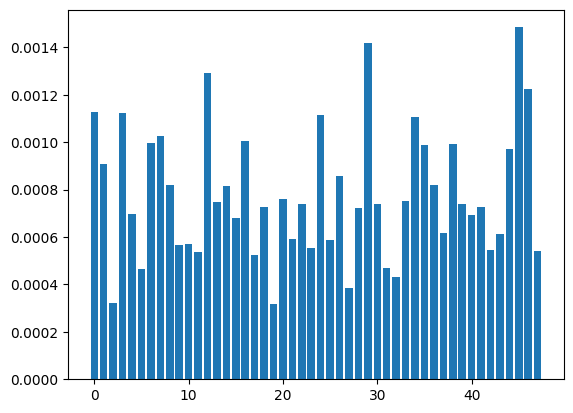

fedorenko 39


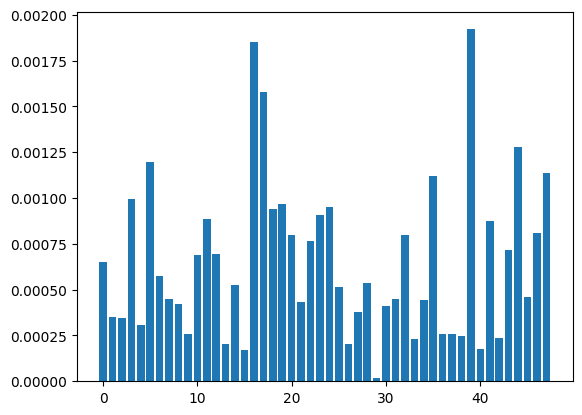

blank 13


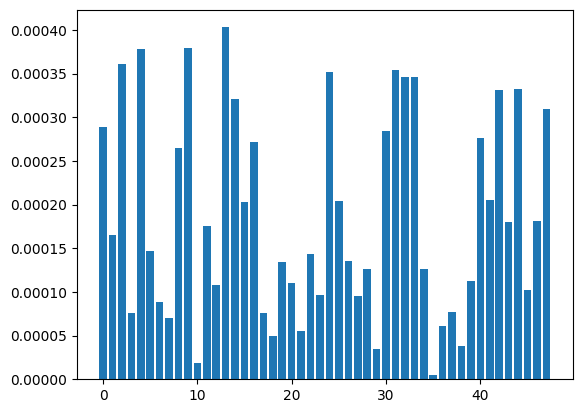

In [70]:
from matplotlib import pyplot as plt

for dataset in ['pereira', 'fedorenko', 'blank']:
    layer_perf_gaussian = []
    for i in range(48):
        perf_mean = load_mean_sem_perf('gaussian', dataset, '', i, niter=1, return_mean=True, print_res=False)
        layer_perf_gaussian.append(perf_mean)
    print(dataset, np.argmax(layer_perf_gaussian))
    plt.bar(np.arange(48), layer_perf_gaussian)
    plt.show()

In [57]:
layer_perf_gaussian

[3.9481444235428544e-05,
 0.00013544489922994363,
 0.0001407946033239423,
 4.6405835248845376e-05,
 0.00029227192264741906,
 0.0001902756502263033,
 9.844357911989083e-05,
 0.00013999774403966234,
 0.00040517206325784707,
 0.00023200756367469468,
 0.0001777756062582477,
 0.00014999454342674024,
 0.00018321240033843575,
 0.00020136902057359222,
 0.00015470829275544365,
 0.000285733632947908,
 0.0003888206923038706,
 0.0001867117693314472,
 0.0005277481143136458,
 0.0003365951685519878,
 0.00031193329913516604,
 0.0002742400355940441,
 0.00028139880111363965,
 7.240972991997181e-05,
 3.2036103493393585e-06,
 0.00010571659713509335,
 0.00035533198126757036,
 0.00018202477054931053,
 0.0002666514264775155,
 0.0001400114797012723,
 0.0003197200822940042,
 0.0002729675779260587,
 0.0001929781558675884,
 6.535867224435332e-05,
 0.00031117977650565456,
 0.00011539727172725962,
 0.0001857530856202568,
 6.119797534303029e-05,
 3.188527671523408e-09,
 0.0005845714574755338,
 0.0001744483364612026